In [2]:
#!/usr/bin/env python
# -*- coding: UTF-8 -*-
"""
@File    ：PressureLocationProcess.py
@Author  zhouxinyu
@Date    ：2022/3/31 14:35
"""
from math import tan
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import math
import os

def imwrite(filename, file):
    dir = os.path.join(os.getcwd(), 'data-5-18')
    if not os.path.exists(dir):
        os.makedirs(dir)
    cv2.imwrite(os.path.join(dir, filename), file)

def cv_show(img):
    cv2.imshow('cv_show', img)
    cv2.waitKey(0)  # 等待时间，毫秒级，0标示按任意键终止
    cv2.destroyAllWindows()
    cv2.waitKey(1)  # 解决mac中窗口不关闭的问题


def showImages(images, titles=[''], size=[1, 1], BGR=False):
    for i in range(len(images)):
        plt.subplot(size[0], size[1], i + 1)
        showImage = images[i]
        if (BGR):
            b, g, r = cv2.split(images[i])
            showImage = cv2.merge([r, g, b])
        plt.imshow(showImage, 'gray')
        plt.title(titles[i])
        plt.xticks([]), plt.yticks([])

# 裁剪黑边
def cutBlack(img):
    gray = np.transpose(
        cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    )
    blackNumbers = 0
    for i in range(0, gray.shape[0]):
        blackNumbers = blackNumbers + 1
        if sum(gray[i] > 0):
            return img[:, blackNumbers: img.shape[1]]

def getDistance(p1, p2):
    return math.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2 + (p1[2] - p2[2])**2)

blockSize = 12
def getAvgColorList(img):
    row = img.shape[0]
    col = img.shape[1]
    # blockSize = 50 # 裁剪区块边长度，正方形
    blocks = []  # 存放切片
    avgColors = []  # 每个区块对应的颜色值
    rowGroupNum = math.ceil(row / blockSize)
    colGroupNum = math.ceil(col / blockSize)
    for i in range(rowGroupNum):
        for j in range(colGroupNum):
            curBlock = img[
                i*blockSize: (i+1)*blockSize,
                j*blockSize: (j+1)*blockSize
            ]
            curB, curG, curR = cv2.split(curBlock)
            avgColors.append((
                int(np.mean(curB)),
                int(np.mean(curG)),
                int(np.mean(curR)),
            ))
            blocks.append(curBlock)
    return rowGroupNum, colGroupNum, blocks, avgColors

def drawBlock(img, blocks):
    res = img.copy()
    row = img.shape[0]
    col = img.shape[1]
    # blockSize = 50 # 裁剪区块边长度，正方形]
    colGroupNum = math.ceil(col / blockSize)
    font_size = 5
    for index in blocks:
        left = blockSize * (index % colGroupNum)
        top = blockSize * int(index / colGroupNum)
        right = left + blockSize
        bottom = top + blockSize
        cv2.rectangle(res, (left, top), (right, bottom),
                      (0, 255, 0), font_size, 4)
    return res

normalList = []  # 正常图片
normalListNumber = 4  # 正常图片数量
for i in range(0, normalListNumber):
    normalList.append(
        cutBlack(cv2.imread(
            '/Users/zhouxinyu/Code/Python/jupyter/Project/ZF/压线筒污染/全量测试数据/正常图片/' + str(i+1) + '.png', cv2.IMREAD_COLOR))
    )

damageList = []  # 污染图片
damageListNumber = 18
for i in range(0, damageListNumber):
    damageList.append(
        cutBlack(cv2.imread(
            '/Users/zhouxinyu/Code/Python/jupyter/Project/ZF/压线筒污染/全量测试数据/筒子污染/' + str(i+1) + '.png', cv2.IMREAD_COLOR))
    )

baseDuck = []  # 标准色
baseDuckNumber = 4
for i in range(0, baseDuckNumber):
    baseImg = cv2.imread(
        '/Users/zhouxinyu/Code/Python/jupyter/Project/ZF/压线筒污染/全量测试数据/base/' + str(i+1) + '.png', cv2.IMREAD_COLOR)
    _, _, _, curBase = getAvgColorList(baseImg)
    baseDuck = list(set(baseDuck) ^ set(curBase))


疑似污染点个数:  20


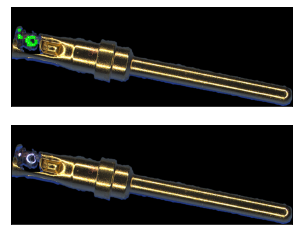

In [4]:
def isKeep(o_list, color):
    if set(o_list).__contains__(color):
        return True
    for o_color in o_list:
        if getDistance(o_color, color) < 20:
            return True
    return False

# 污染图片
targetImg = damageList[13]
# 正常图片
# targetImg = normalList[3]

_, _, _, targetBaseColors = getAvgColorList(targetImg[:, int(0.25 * targetImg.shape[1]):int(1 * targetImg.shape[1])])
_, _, _, p1Colors = getAvgColorList(targetImg)

baseColors = list(set(targetBaseColors) ^ set(baseDuck))
diffColorIndex = []
for i in range(len(p1Colors)):
    if not isKeep(baseColors, p1Colors[i]):
        diffColorIndex.append(i)
print("疑似污染点个数: ", len(diffColorIndex))
# cv_show(drawBlock(targetImg, diffColorIndex))
imwrite('压线筒污染3-结果.png', drawBlock(targetImg, diffColorIndex))
showImages([drawBlock(targetImg, diffColorIndex), targetImg],['', ''], [2,1], BGR=True)
# showImages([targetImg], BGR=True)

In [2]:
toShowImg = damageList[17]
curTargetImg = toShowImg[:, int(0.25 * toShowImg.shape[1]):int(0.55 * toShowImg.shape[1])]
showImages([cv2.imread(
        './全量测试数据/base/1.png', cv2.IMREAD_COLOR), curTargetImg], ['', ''], [2, 1], BGR=True)


NameError: name 'damageList' is not defined

In [172]:
test = cv2.imread(
            '/Users/zhouxinyu/Code/Python/jupyter/Project/ZF/压线筒污染/全量测试数据/正常图片/' + str(1) + '.png', cv2.IMREAD_COLOR)

numpy.ndarray